In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Se definió la probabilidad de pasar a la siguiente etapa de edad como
$$ \frac{1}{\text{dias en etapa}} \times  \text{probabilidad de sobrevivir} $$

La probabilidad de sobrevivir es $1-0.065 = 0.93$ (promedio para todas las edades)

El tiempo que dura cada etapa en pasar a la otra

$N_1 \rightarrow N_2 = 14.9 \text{ días}$

$N_2 \rightarrow N_3 = 18.5 \text{ días}$

$N_3 \rightarrow N_4 = 32.9 \text{ días}$

$N_4 \rightarrow N_5 = 29.4 \text{ días}$

$N_5 \rightarrow N_6 = 32.5 \text{ días}$

Como el adulto dura aproximadamente un año vivo y pone $514.1$ huevos fértiles en todo ese tiempo, la fertilidad $\beta$ es

$\beta = \frac{514.1}{365-14.9-18.5-32.9-29.4-32.5}  = 2.17 \frac{\text{huevos}}{\text{día}}$

Se multiplicó todo por 14 días para simular mediciones en ese intervalo de tiempo

In [2]:
L1 = (0,0,0,0,0, 2.17*10)
L2 = (14/14.9 * 0.93, 0,0,0,0,0)
L3 = (0, 14/18.5 * 0.93, 0,0,0,0)
L4 = (0,0, 14/32.9 * 0.93, 0,0,0)
L5 = (0,0,0, 14/29.4 * 0.93, 0,0)
L6 = (0,0,0,0, 14/32.5 * 0.93, 0)
Lori = matrix( (L1,L2,L3,L4,L5,L6) )

la matrix de Leslie es entonces

In [3]:
Lori

matrix([[  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,  21.7       ],
        [  0.8738255 ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.70378378,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.39574468,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.44285714,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.40061538,   0.        ]])

Se usa la cantidad actual de organismos para multiplicarlo múltiples veces por la matríz de leslie. y ver si esos valores mantienen la población estable 

In [4]:
Nfin = matrix((165,405,386,162,138,83))

In [5]:
dat = zeros((20,6))

In [6]:
L=Lori
dat[0,]= (L*Nfin.T).T

In [7]:
for i in range(1,20):
    L = L*Lori
    dat[i,] = (L*Nfin.T).T

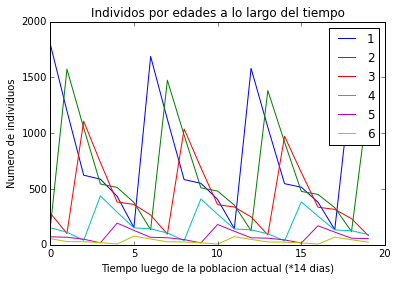

In [10]:
for i in range(0,6):
    plot(dat[:,i], label=i+1)
xlabel("Tiempo luego de la poblacion actual (*14 dias)")
ylabel("Numero de individuos")
title("Individos por edades a lo largo del tiempo")
legend()

Luego de $280$ días (20*14) se observa que la población oscila en torno a sus valores originales

In [158]:
linalg.eig(identity(6)- Lori) 

(array([ 0.01079035+0.j        ,  0.50539517+0.85668069j,
         0.50539517-0.85668069j,  1.49460483+0.85668069j,
         1.49460483-0.85668069j,  1.98920965+0.j        ]),
 matrix([[-0.66618367 +0.00000000e+00j,  0.66618367 +0.00000000e+00j,
           0.66618367 -0.00000000e+00j,  0.66618367 +0.00000000e+00j,
           0.66618367 -0.00000000e+00j, -0.66618367 +0.00000000e+00j],
         [-0.58847816 +0.00000000e+00j,  0.29423908 +5.09637040e-01j,
           0.29423908 -5.09637040e-01j, -0.29423908 +5.09637040e-01j,
          -0.29423908 -5.09637040e-01j,  0.58847816 +0.00000000e+00j],
         [-0.41867908 +0.00000000e+00j, -0.20933954 +3.62586722e-01j,
          -0.20933954 -3.62586722e-01j, -0.20933954 -3.62586722e-01j,
          -0.20933954 +3.62586722e-01j, -0.41867908 +0.00000000e+00j],
         [-0.16749738 +0.00000000e+00j, -0.16749738 +1.80411242e-16j,
          -0.16749738 -1.80411242e-16j,  0.16749738 +3.19189120e-16j,
           0.16749738 -3.19189120e-16j,  0.16749738